In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_excel("AnomaData.xlsx", sheet_name='Sheet1')

In [4]:
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'], errors='coerce')


In [5]:
# EDA - Checking data quality
print("Data Summary:")
print(data.info())
print("Missing Values:")
print(data.isnull().sum())



Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64     

In [6]:
# Handling missing values - dropping or imputing
data = data.dropna()

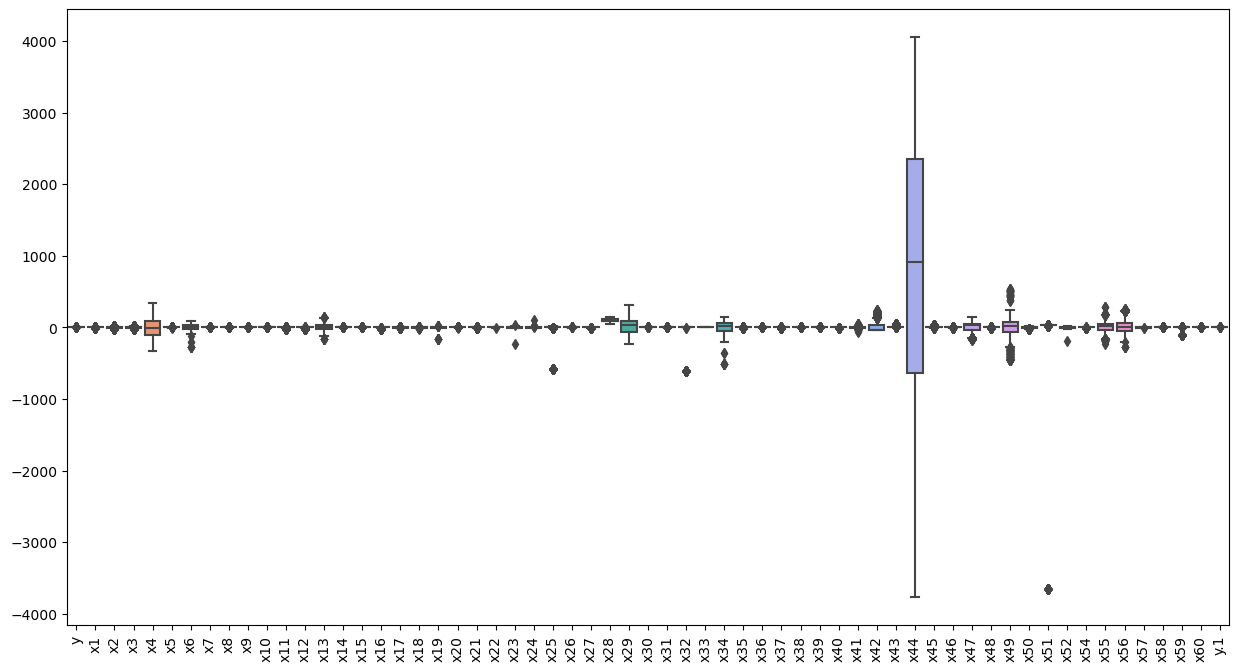

In [7]:
# Checking for outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

In [8]:
# Removing outliers based on z-score
from scipy.stats import zscore
data = data[(np.abs(zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [9]:
# Feature Engineering - Example: Extracting year, month, etc., from the time column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour

In [10]:
# Feature Selection - Dropping less relevant columns if necessary
# Assuming 'y' is the target column
X = data.drop(['y', 'time'], axis=1)
y = data['y']

In [11]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [14]:
# Predicting and Evaluation
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [15]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
import joblib 
joblib.dump(grid_search.best_estimator_, 'model.pkl')

['model.pkl']